In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [13]:
df = pd.read_csv("spotify.csv")

In [3]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [4]:
relevant_cols = ["danceability", "energy", "valence"]
music_df = df[relevant_cols]

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(music_df)

C:\Users\mgm_c\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mgm_c\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mgm_c\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mgm_c\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

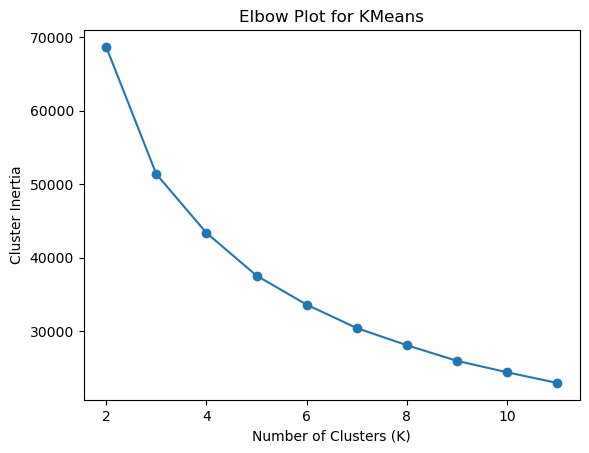

In [6]:
def find_best_clusters(df, maximum_K):
    clusters_inertia = []
    k_values = []
    for k in range(2, maximum_K):
        kmeans_model = KMeans(n_clusters=k, random_state=42)
        kmeans_model.fit(df)
        clusters_inertia.append(kmeans_model.inertia_)
        k_values.append(k)
    return clusters_inertia, k_values

clusters_inertia, k_values = find_best_clusters(scaled_data, 12)

# Generate Elbow Plot
plt.plot(k_values, clusters_inertia, 'o-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Cluster Inertia")
plt.title("Elbow Plot for KMeans")
plt.show()


In [21]:
optimal_k = 8  # Choose the optimal number of clusters
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_model.fit(scaled_data)

# Add cluster labels to the original dataframe
df["clusters"] = kmeans_model.labels_


C:\Users\mgm_c\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


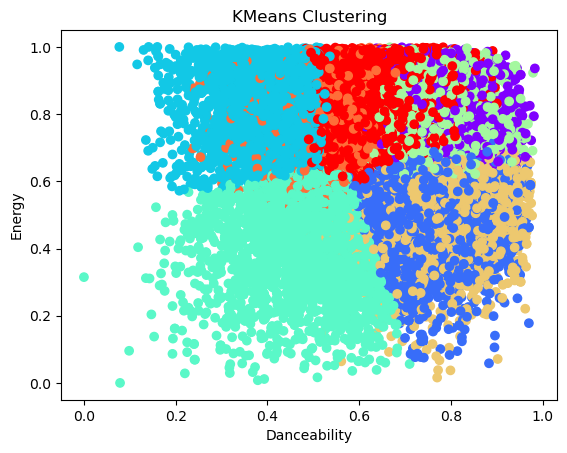

In [22]:
plt.scatter(df["danceability"], df["energy"], c=df["clusters"], cmap='rainbow')
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("KMeans Clustering")
plt.show()
